In [204]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
import seaborn as sns
sns.set()

In [205]:
df = pd.read_csv('OnlineRetail.csv',encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [206]:
df.drop(['StockCode', 'Description'], axis=1, inplace=True)

In [207]:
# Convert datatype and find revenue
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.year * 100 + df['InvoiceDate'].dt.month
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.tail()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,France,201112,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,France,201112,12.60
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0,France,201112,16.60
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0,France,201112,16.60
541908,581587,3,2011-12-09 12:50:00,4.95,12680.0,France,201112,14.85


# Explore Data

In [208]:
# Calculate revenue by month and plot
rev_by_month = df[['InvoiceYearMonth', 'Revenue']].groupby('InvoiceYearMonth').sum()
rev_by_month.rename(columns={"Revenue": "Revenue by Month"}, inplace=True)
rev_month_plot = rev_by_month.reset_index()
rev_month_plot

,InvoiceYearMonth,Revenue by Month
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


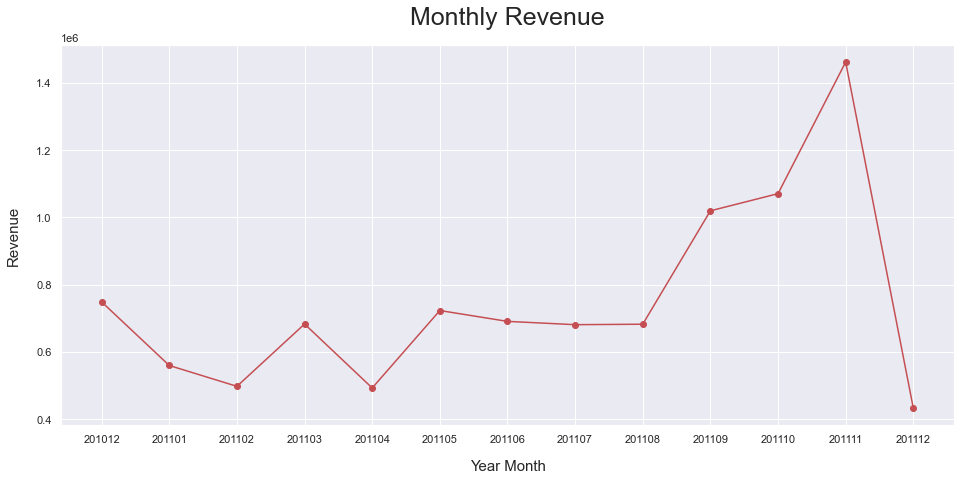

In [209]:
plt.figure(figsize=(16,7))
plt.plot(rev_month_plot['InvoiceYearMonth'].astype('str'), rev_month_plot['Revenue by Month'], '-ro')
plt.xticks(rotation=0)
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Revenue',labelpad=15, fontsize=15)
plt.title('Monthly Revenue', pad=20, fontsize=25)
plt.show()

In [210]:
# Calculate monthly revenue growth rate
rev_month_plot['MonthlyGrowth'] = rev_month_plot['Revenue by Month'].pct_change(periods=1)
rev_month_plot

,InvoiceYearMonth,Revenue by Month,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


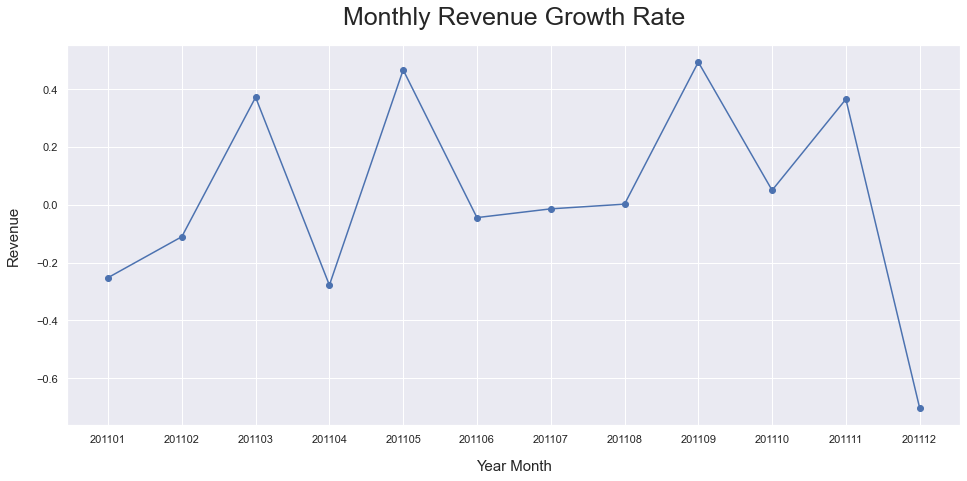

In [211]:
plt.figure(figsize=(16,7))
plt.plot(rev_month_plot['InvoiceYearMonth'].astype('str'), rev_month_plot['MonthlyGrowth'], '-o')
plt.xticks(rotation=0)
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Revenue',labelpad=15, fontsize=15)
plt.title('Monthly Revenue Growth Rate', pad=20, fontsize=25)
plt.show()

- In Monthly Revenue Growth Rate Graph, we can see everything maybe ok.
- But it have 2 special time(04/2011, and 12/2011).
- In 12/2011 maybe data is imcomplete.
- But what happen in 04/2011?(-0.27) Is that active customer decrease or customer order less?
Analysis now

In [212]:
# Revenue by country
rev_by_country = df[['Country', 'Revenue']].groupby('Country').sum().reset_index()
rev_by_country.rename(columns={"Revenue": "RevenueByCountry"}, inplace=True)
rev_by_country.sort_values(by="RevenueByCountry", ascending=False, inplace=True)
rev_by_country

,Country,RevenueByCountry
36,United Kingdom,8.187806e+06
24,Netherlands,2.846615e+05
10,EIRE,2.632768e+05
14,Germany,2.216982e+05
13,France,1.974039e+05
0,Australia,1.370773e+05
33,Switzerland,5.638535e+04
31,Spain,5.477458e+04
3,Belgium,4.091096e+04
32,Sweden,3.659591e+04


<AxesSubplot:ylabel='RevenueByCountry'>

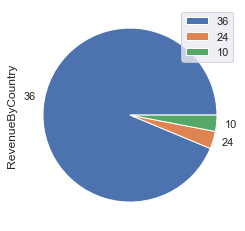

In [213]:
rev_by_country[:3].plot.pie(y='RevenueByCountry')

We can see almost revenue are in United Kingdom. So we will focus on this country.

In [214]:
new_df = df.loc[df['Country'] == 'United Kingdom'] 
new_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
...,...,...,...,...,...,...,...,...
541889,581585,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,201112,23.40
541890,581586,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,201112,23.60
541891,581586,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,201112,30.00
541892,581586,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,201112,214.80


In [215]:
# Count active customer by month
monthly_cus_ = new_df[['CustomerID', 'InvoiceYearMonth']].groupby('InvoiceYearMonth').nunique()
monthly_cus = monthly_cus_.reset_index()
monthly_cus.rename(columns={'CustomerID': 'NumOfCus'}, inplace=True)
monthly_cus

,InvoiceYearMonth,NumOfCus
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


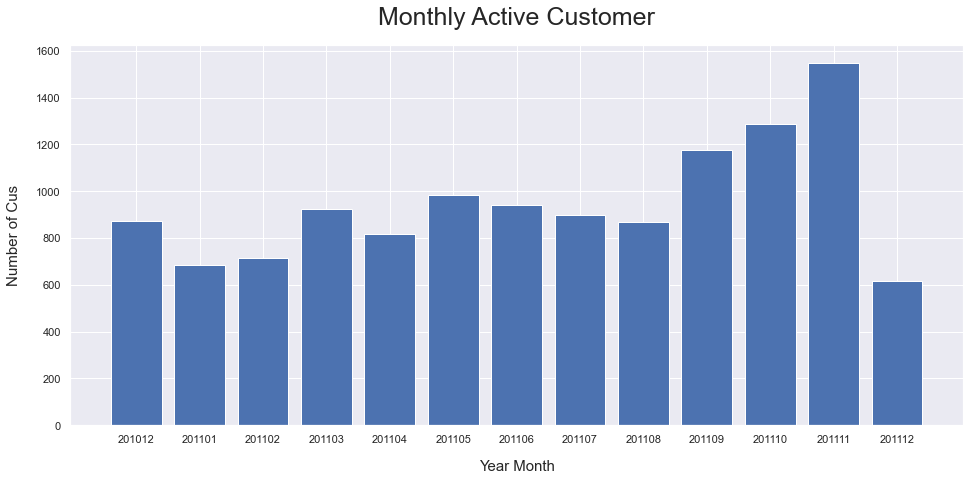

In [216]:
plt.figure(figsize=(16,7))
plt.bar(monthly_cus['InvoiceYearMonth'].astype('str'), monthly_cus['NumOfCus'])
plt.xticks(rotation=0)
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Number of Cus',labelpad=15, fontsize=15)
plt.title('Monthly Active Customer', pad=20, fontsize=25)
plt.show()

In [217]:
monthly_cus_growth = monthly_cus_.pct_change()
monthly_cus_growth = monthly_cus_growth.reset_index()
monthly_cus_growth.rename(columns={'CustomerID': 'ActiveCusGrowth'}, inplace=True)
monthly_cus_growth

,InvoiceYearMonth,ActiveCusGrowth
0,201012,NaN
1,201101,-0.214696
2,201102,0.043860
3,201103,0.292717
4,201104,-0.114843
5,201105,0.205630
6,201106,-0.042640
7,201107,-0.046660
8,201108,-0.035595
9,201109,0.357555


In [218]:
trend_cus_rev = pd.merge(rev_month_plot, monthly_cus_growth, on='InvoiceYearMonth')
trend_cus_rev.drop('Revenue by Month', axis=1, inplace=True)
trend_cus_rev.rename(columns={'CustomerID': 'ActiveCusGrowth'}, inplace=True)
trend_cus_rev

,InvoiceYearMonth,MonthlyGrowth,ActiveCusGrowth
0,201012,NaN,NaN
1,201101,-0.252293,-0.214696
2,201102,-0.110603,0.043860
3,201103,0.371850,0.292717
4,201104,-0.278163,-0.114843
5,201105,0.466592,0.205630
6,201106,-0.044530,-0.042640
7,201107,-0.014213,-0.046660
8,201108,0.002026,-0.035595
9,201109,0.493653,0.357555


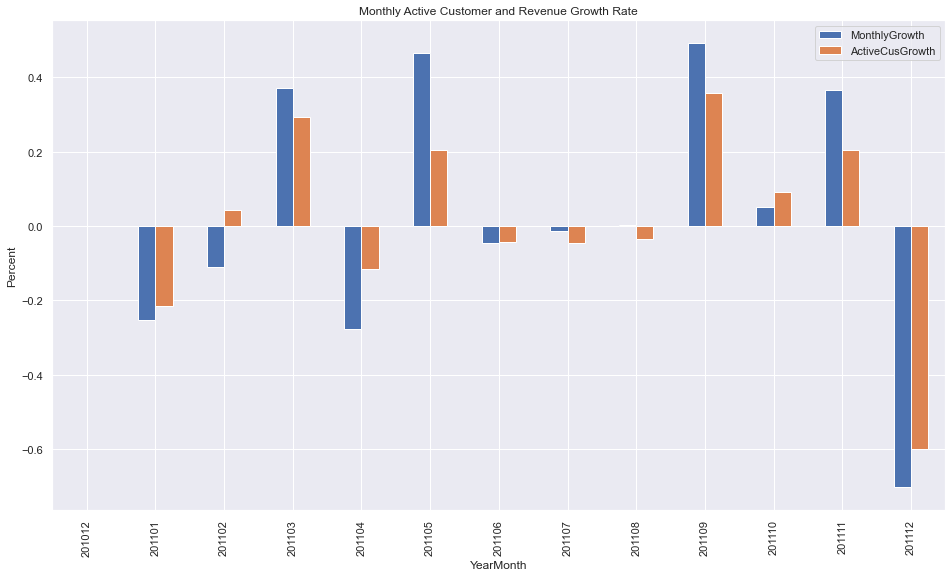

In [219]:
trend_cus_rev.plot(kind='bar',x='InvoiceYearMonth', y=['MonthlyGrowth', 'ActiveCusGrowth'], figsize=(16,9),
                  title='Monthly Active Customer and Revenue Growth Rate',
                   xlabel='YearMonth', ylabel='Percent')
plt.show()

- In 02/2011, the revenue decrease while the active customer increase. Why??
- In the others month, we will see the same trend of number of order and revenue as well.

In [220]:
monthly_sales = new_df[['InvoiceYearMonth', 'Quantity']].groupby('InvoiceYearMonth').sum().reset_index()
monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


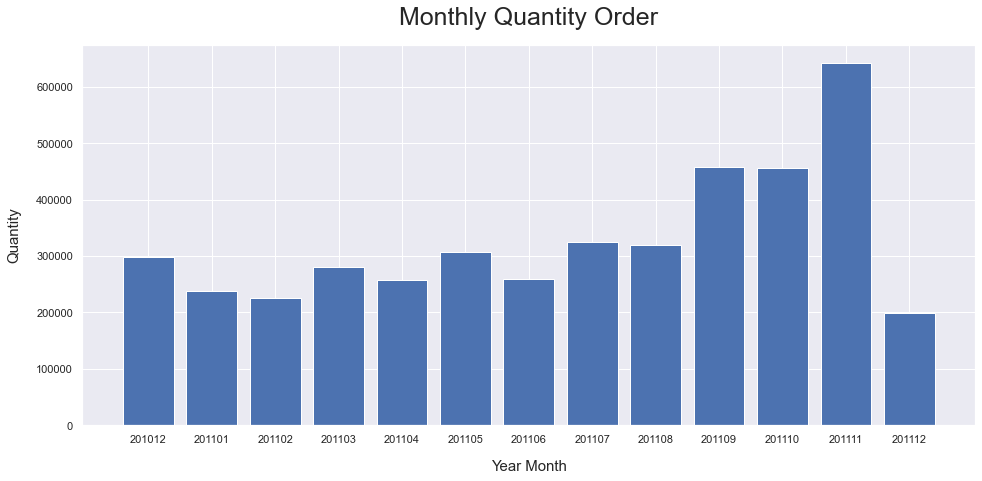

In [221]:
plt.figure(figsize=(16,7))
plt.bar(monthly_sales['InvoiceYearMonth'].astype('str'), monthly_sales['Quantity'])
plt.xticks(rotation=0)
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Quantity',labelpad=15, fontsize=15)
plt.title('Monthly Quantity Order', pad=20, fontsize=25)
plt.show()

As we expected, the number of order is also decrease in April (279k -> 257k) 

In [222]:
# Calcute avarage revenue of order
monthly_order_avg = new_df[['InvoiceYearMonth', 'Revenue']].groupby('InvoiceYearMonth').mean().reset_index()
monthly_order_avg.rename(columns={'Revenue': 'Average Revenue'}, inplace=True)
monthly_order_avg

,InvoiceYearMonth,Average Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


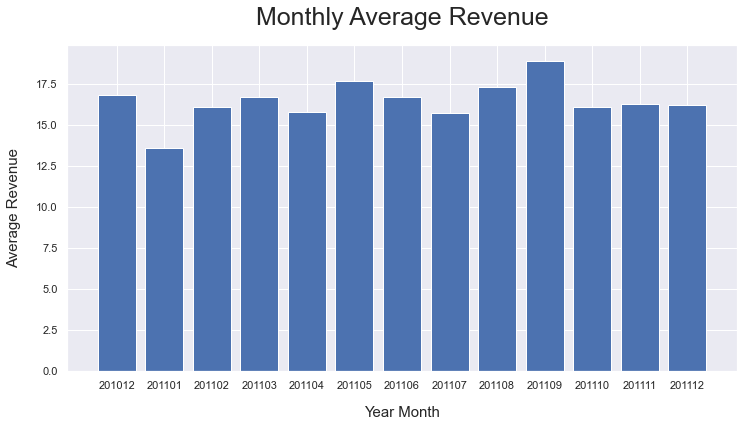

In [223]:
plt.figure(figsize=(12,6))
plt.bar(monthly_order_avg['InvoiceYearMonth'].astype('str'), monthly_order_avg['Average Revenue'])
plt.xticks(rotation=0)
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Average Revenue',labelpad=15, fontsize=15)
plt.title('Monthly Average Revenue', pad=20, fontsize=25)
plt.show()

# Check Customer Type

We will split customer to 3 type:
- New: The customer who first appear in that month
- Old: The customer who existed before
- Other: The customer who cann't identify(Don't have CustomerID)

In [224]:
first_month_access = new_df[['InvoiceYearMonth', 'CustomerID']].groupby('CustomerID').min().reset_index()
first_month_access.rename(columns={'InvoiceYearMonth': 'FirstMonthAccess'}, inplace=True)
first_month_access

,CustomerID,FirstMonthAccess
0,12346.0,201101
1,12747.0,201012
2,12748.0,201012
3,12749.0,201105
4,12820.0,201101
...,...,...
3945,18280.0,201103
3946,18281.0,201106
3947,18282.0,201108
3948,18283.0,201101


In [225]:
df_merge_access_month = pd.merge(new_df, first_month_access, on='CustomerID', how='left')
df_merge_access_month

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,FirstMonthAccess
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,201012.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,201012.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012.0
...,...,...,...,...,...,...,...,...,...
495473,581585,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,201112,23.40,201105.0
495474,581586,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,201112,23.60,201012.0
495475,581586,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,201112,30.00,201012.0
495476,581586,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,201112,214.80,201012.0


In [226]:
df_merge_access_month['CustomerType'] = 'Old'
df_merge_access_month.loc[df_merge_access_month['CustomerID'].isnull(), 'CustomerType'] = 'Other'
df_merge_access_month.loc[
    df_merge_access_month['InvoiceYearMonth'] == df_merge_access_month['FirstMonthAccess'], 'CustomerType'
] = 'New'
df_merge_access_month

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,FirstMonthAccess,CustomerType
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,201012.0,New
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012.0,New
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,201012.0,New
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012.0,New
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,201012.0,New
...,...,...,...,...,...,...,...,...,...,...
495473,581585,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,201112,23.40,201105.0,Old
495474,581586,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,201112,23.60,201012.0,Old
495475,581586,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,201112,30.00,201012.0,Old
495476,581586,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,201112,214.80,201012.0,Old


In [227]:
# Calculate revenue by customer type
Rev_By_CusType = df_merge_access_month[['InvoiceYearMonth', 'CustomerType', 'Revenue']].groupby(['InvoiceYearMonth', 'CustomerType']).sum().reset_index()
Rev_By_CusType.rename(columns={"Revenue": "Revenue By Type"}, inplace=True)
# Calculate all revenue 
Monthly_Rev = new_df[['InvoiceYearMonth', 'Revenue']].groupby('InvoiceYearMonth').sum().reset_index()
Monthly_Rev.rename(columns={'Revenue': 'All Revenue'}, inplace=True)
# Calculate percent of each Customer Type
Stats_Type_Rev = pd.merge(Rev_By_CusType, Monthly_Rev, on='InvoiceYearMonth')
Stats_Type_Rev['Percent'] = (Stats_Type_Rev['Revenue By Type'] / Stats_Type_Rev['All Revenue'] * 100).round(2)
Stats_Type_Rev

,InvoiceYearMonth,CustomerType,Revenue By Type,All Revenue,Percent
0,201012,New,483799.740,676742.620,71.49
1,201012,Other,192942.880,676742.620,28.51
2,201101,New,156705.770,434308.300,36.08
3,201101,Old,195275.510,434308.300,44.96
4,201101,Other,82327.020,434308.300,18.96
5,201102,New,127859.000,408247.910,31.32
6,201102,Old,220994.630,408247.910,54.13
7,201102,Other,59394.280,408247.910,14.55
8,201103,New,160567.840,559707.390,28.69
9,201103,Old,296350.030,559707.390,52.95


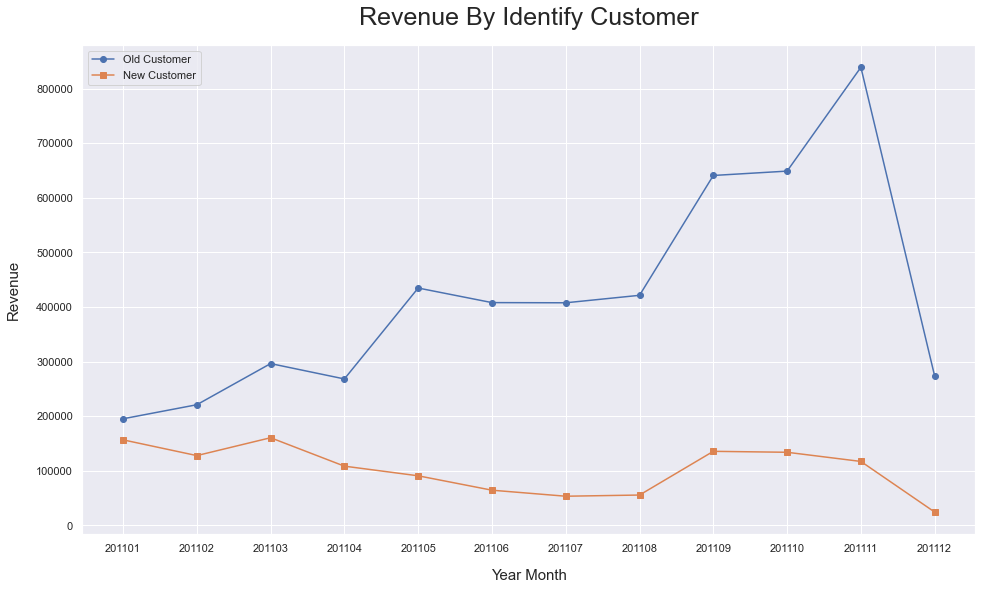

In [228]:
old_cus_rev = Stats_Type_Rev[(Stats_Type_Rev['CustomerType'] == 'Old') & (Stats_Type_Rev['InvoiceYearMonth'] > 201012)]
new_cus_rev = Stats_Type_Rev[(Stats_Type_Rev['CustomerType'] == 'New') & (Stats_Type_Rev['InvoiceYearMonth'] > 201012)]
plt.figure(figsize=(16, 9))
plt.plot(old_cus_rev['InvoiceYearMonth'].astype('str'), old_cus_rev['Revenue By Type'],'-o', label='Old Customer')
plt.plot(new_cus_rev['InvoiceYearMonth'].astype('str'), new_cus_rev['Revenue By Type'],'-s', label='New Customer')
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Revenue',labelpad=15, fontsize=15)
plt.title('Revenue By Identify Customer', pad=20, fontsize=25)
plt.legend()
plt.show()

- Old customers's revenue are showing a positive trend and tell us that our customer base is growing but new customers's revenue have a slight negative trend.
- Let's try with the number of each customer type

In [229]:
df_try = df_merge_access_month[(df_merge_access_month['CustomerType'] == 'New') | ((df_merge_access_month['CustomerType'] == 'Old'))]
num_type_cus = df_try[['InvoiceYearMonth', 'CustomerType', 'CustomerID']].groupby(['InvoiceYearMonth', 'CustomerType']).nunique().reset_index()
num_type_cus.rename(columns={'CustomerID': 'NumOfCustomer'}, inplace=True)
num_type_cus = num_type_cus[num_type_cus['InvoiceYearMonth'] > 201012]
num_type_cus

,InvoiceYearMonth,CustomerType,NumOfCustomer
1,201101,New,362
2,201101,Old,322
3,201102,New,339
4,201102,Old,375
5,201103,New,408
6,201103,Old,515
7,201104,New,276
8,201104,Old,541
9,201105,New,252
10,201105,Old,733


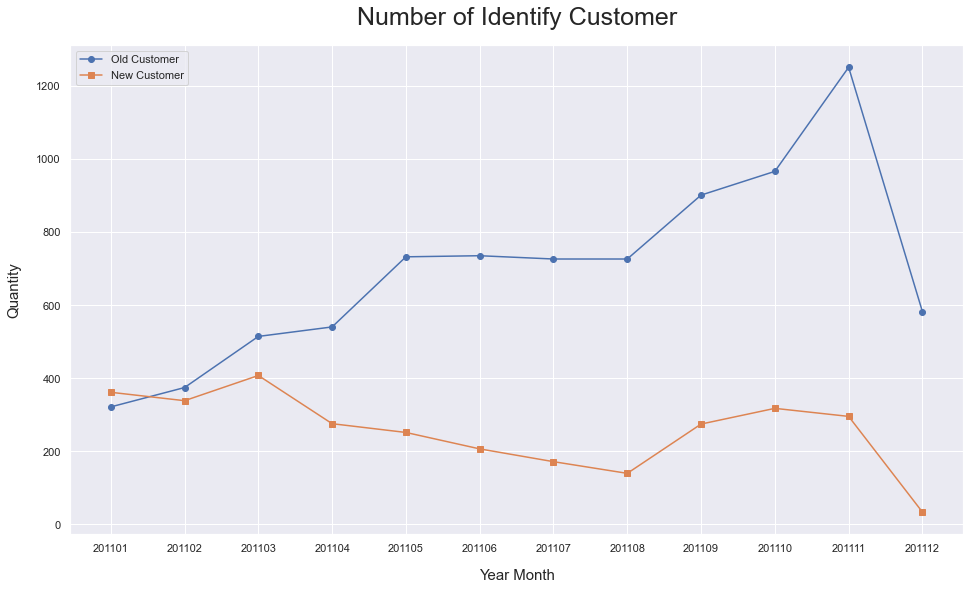

In [230]:
old_cus = num_type_cus[num_type_cus['CustomerType'] == 'Old']
new_cus = num_type_cus[num_type_cus['CustomerType'] == 'New']
plt.figure(figsize=(16, 9))
plt.plot(old_cus['InvoiceYearMonth'].astype('str'), old_cus['NumOfCustomer'],'-o', label='Old Customer')
plt.plot(new_cus['InvoiceYearMonth'].astype('str'), new_cus['NumOfCustomer'],'-s', label='New Customer')
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Quantity',labelpad=15, fontsize=15)
plt.title('Number of Identify Customer', pad=20, fontsize=25)
plt.legend()
plt.show()

# Monthly Retention Rate
#### We need check retention rate to see how sticky is our service and how well your product fits the market
+ Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total
+ Solution:
    1. identify which users are active by looking at their revenue per month
    2. remove active customer without generate revenue (=0)
    3. crosstab to generate active customer by month
    4. use for loop to check 2 consecutive month

In [231]:
df_mrr = new_df[['CustomerID', 'InvoiceYearMonth', 'Revenue']].groupby(['CustomerID', 'InvoiceYearMonth']).sum().reset_index()
df_mrr = df_mrr[df_mrr['Revenue'] > 0]
df_mrr


,CustomerID,InvoiceYearMonth,Revenue
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
5,12747.0,201106,376.30
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [232]:
df_cross = pd.crosstab(df_mrr['CustomerID'], df_mrr['InvoiceYearMonth']).reset_index()
df_cross

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
1,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
3,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
4,12821.0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3910,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3911,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3912,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1


In [233]:
mrr = {}
for i in range(1, len(df_cross.columns) - 1): 
    previous = df_cross.columns[i]
    current = df_cross.columns[i+1]
    mrr[current] = df_cross.loc[(df_cross[previous] > 0) & df_cross[current] > 0][current].count()
mrr

{201101: 287,
 201102: 230,
 201103: 250,
 201104: 272,
 201105: 335,
 201106: 363,
 201107: 330,
 201108: 350,
 201109: 382,
 201110: 441,
 201111: 548,
 201112: 339}

In [234]:
df_mrr_month = pd.DataFrame.from_dict(mrr, orient='index', columns=['MonthlyRetentionRate']).reset_index()
df_mrr_month.columns = ['InvoiceYearMonth', 'RetainedCustomer']
df_mrr_month

,InvoiceYearMonth,RetainedCustomer
0,201101,287
1,201102,230
2,201103,250
3,201104,272
4,201105,335
5,201106,363
6,201107,330
7,201108,350
8,201109,382
9,201110,441


In [235]:
mrr_merge = pd.merge(df_mrr_month, monthly_cus, on='InvoiceYearMonth')
mrr_merge['Percent']= (mrr_merge['RetainedCustomer'] / mrr_merge['NumOfCus'] * 100).round(2)
mrr_merge

,InvoiceYearMonth,RetainedCustomer,NumOfCus,Percent
0,201101,287,684,41.96
1,201102,230,714,32.21
2,201103,250,923,27.09
3,201104,272,817,33.29
4,201105,335,985,34.01
5,201106,363,943,38.49
6,201107,330,899,36.71
7,201108,350,867,40.37
8,201109,382,1177,32.46
9,201110,441,1285,34.32


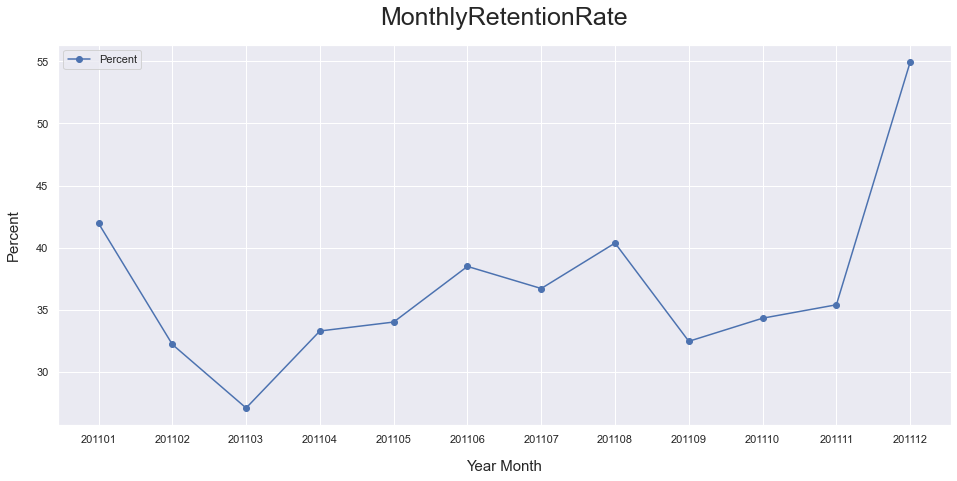

In [236]:
plt.figure(figsize=(16, 7))
plt.plot(mrr_merge['InvoiceYearMonth'].astype('str'), mrr_merge['Percent'], '-o', label='Percent')
plt.title('MonthlyRetentionRate', fontsize=25, pad=20)
plt.xlabel('Year Month', labelpad=15, fontsize=15)
plt.ylabel('Percent',labelpad=15, fontsize=15)
plt.legend()
plt.show()